# Notebook de nettoyage

## Mise en place

Modules et paramétrages utilisés le long de ce notebook.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
% matplotlib inline
plt.style.use(style='ggplot')
mpl.rcParams['figure.dpi'] = 100

Chargeons les données en utilisant le séparateur `\t` comme indiqué dans le fichier de description des données, et affichons un aperçu de ses premières lignes.

In [3]:
data = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informations sommaires sur le fichier de données

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


## Traitement des données manquantes

Quelle est la part d'éléments manquants et non manquants dans nos données brutes, en tout?

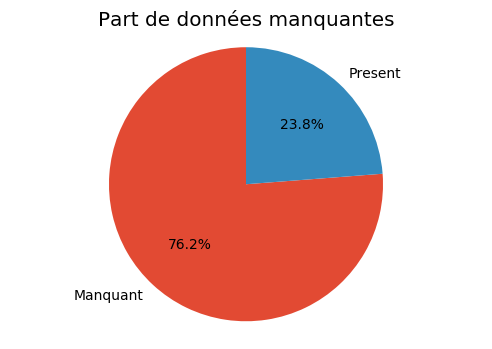

In [5]:
labels = 'Manquant', 'Present'

fig, ax = plt.subplots()
sizes = data.isnull().sum().sum(), data.notnull().sum().sum()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # s'assurer que le graphe soit un cercle
ax.set_title('Part de données manquantes')

plt.show()

Quelle est la part d'éléments manquants et non manquants pour chaque variable? Créeons une dataframe contenant cette information et représentons-la sous forme graphique.

In [6]:
presence_columns = pd.DataFrame(
    data=(data.notnull()
          .sum(axis=0)
          .divide(len(data)) # normaliser
          .multiply(100)
          .sort_values()),
    columns=['% present'])

presence_columns.head(n=10)

,% present
melissic-acid_100g,0.0
chlorophyl_100g,0.0
nervonic-acid_100g,0.0
erucic-acid_100g,0.0
mead-acid_100g,0.0
elaidic-acid_100g,0.0
glycemic-index_100g,0.0
cerotic-acid_100g,0.0
lignoceric-acid_100g,0.0
caproic-acid_100g,0.0


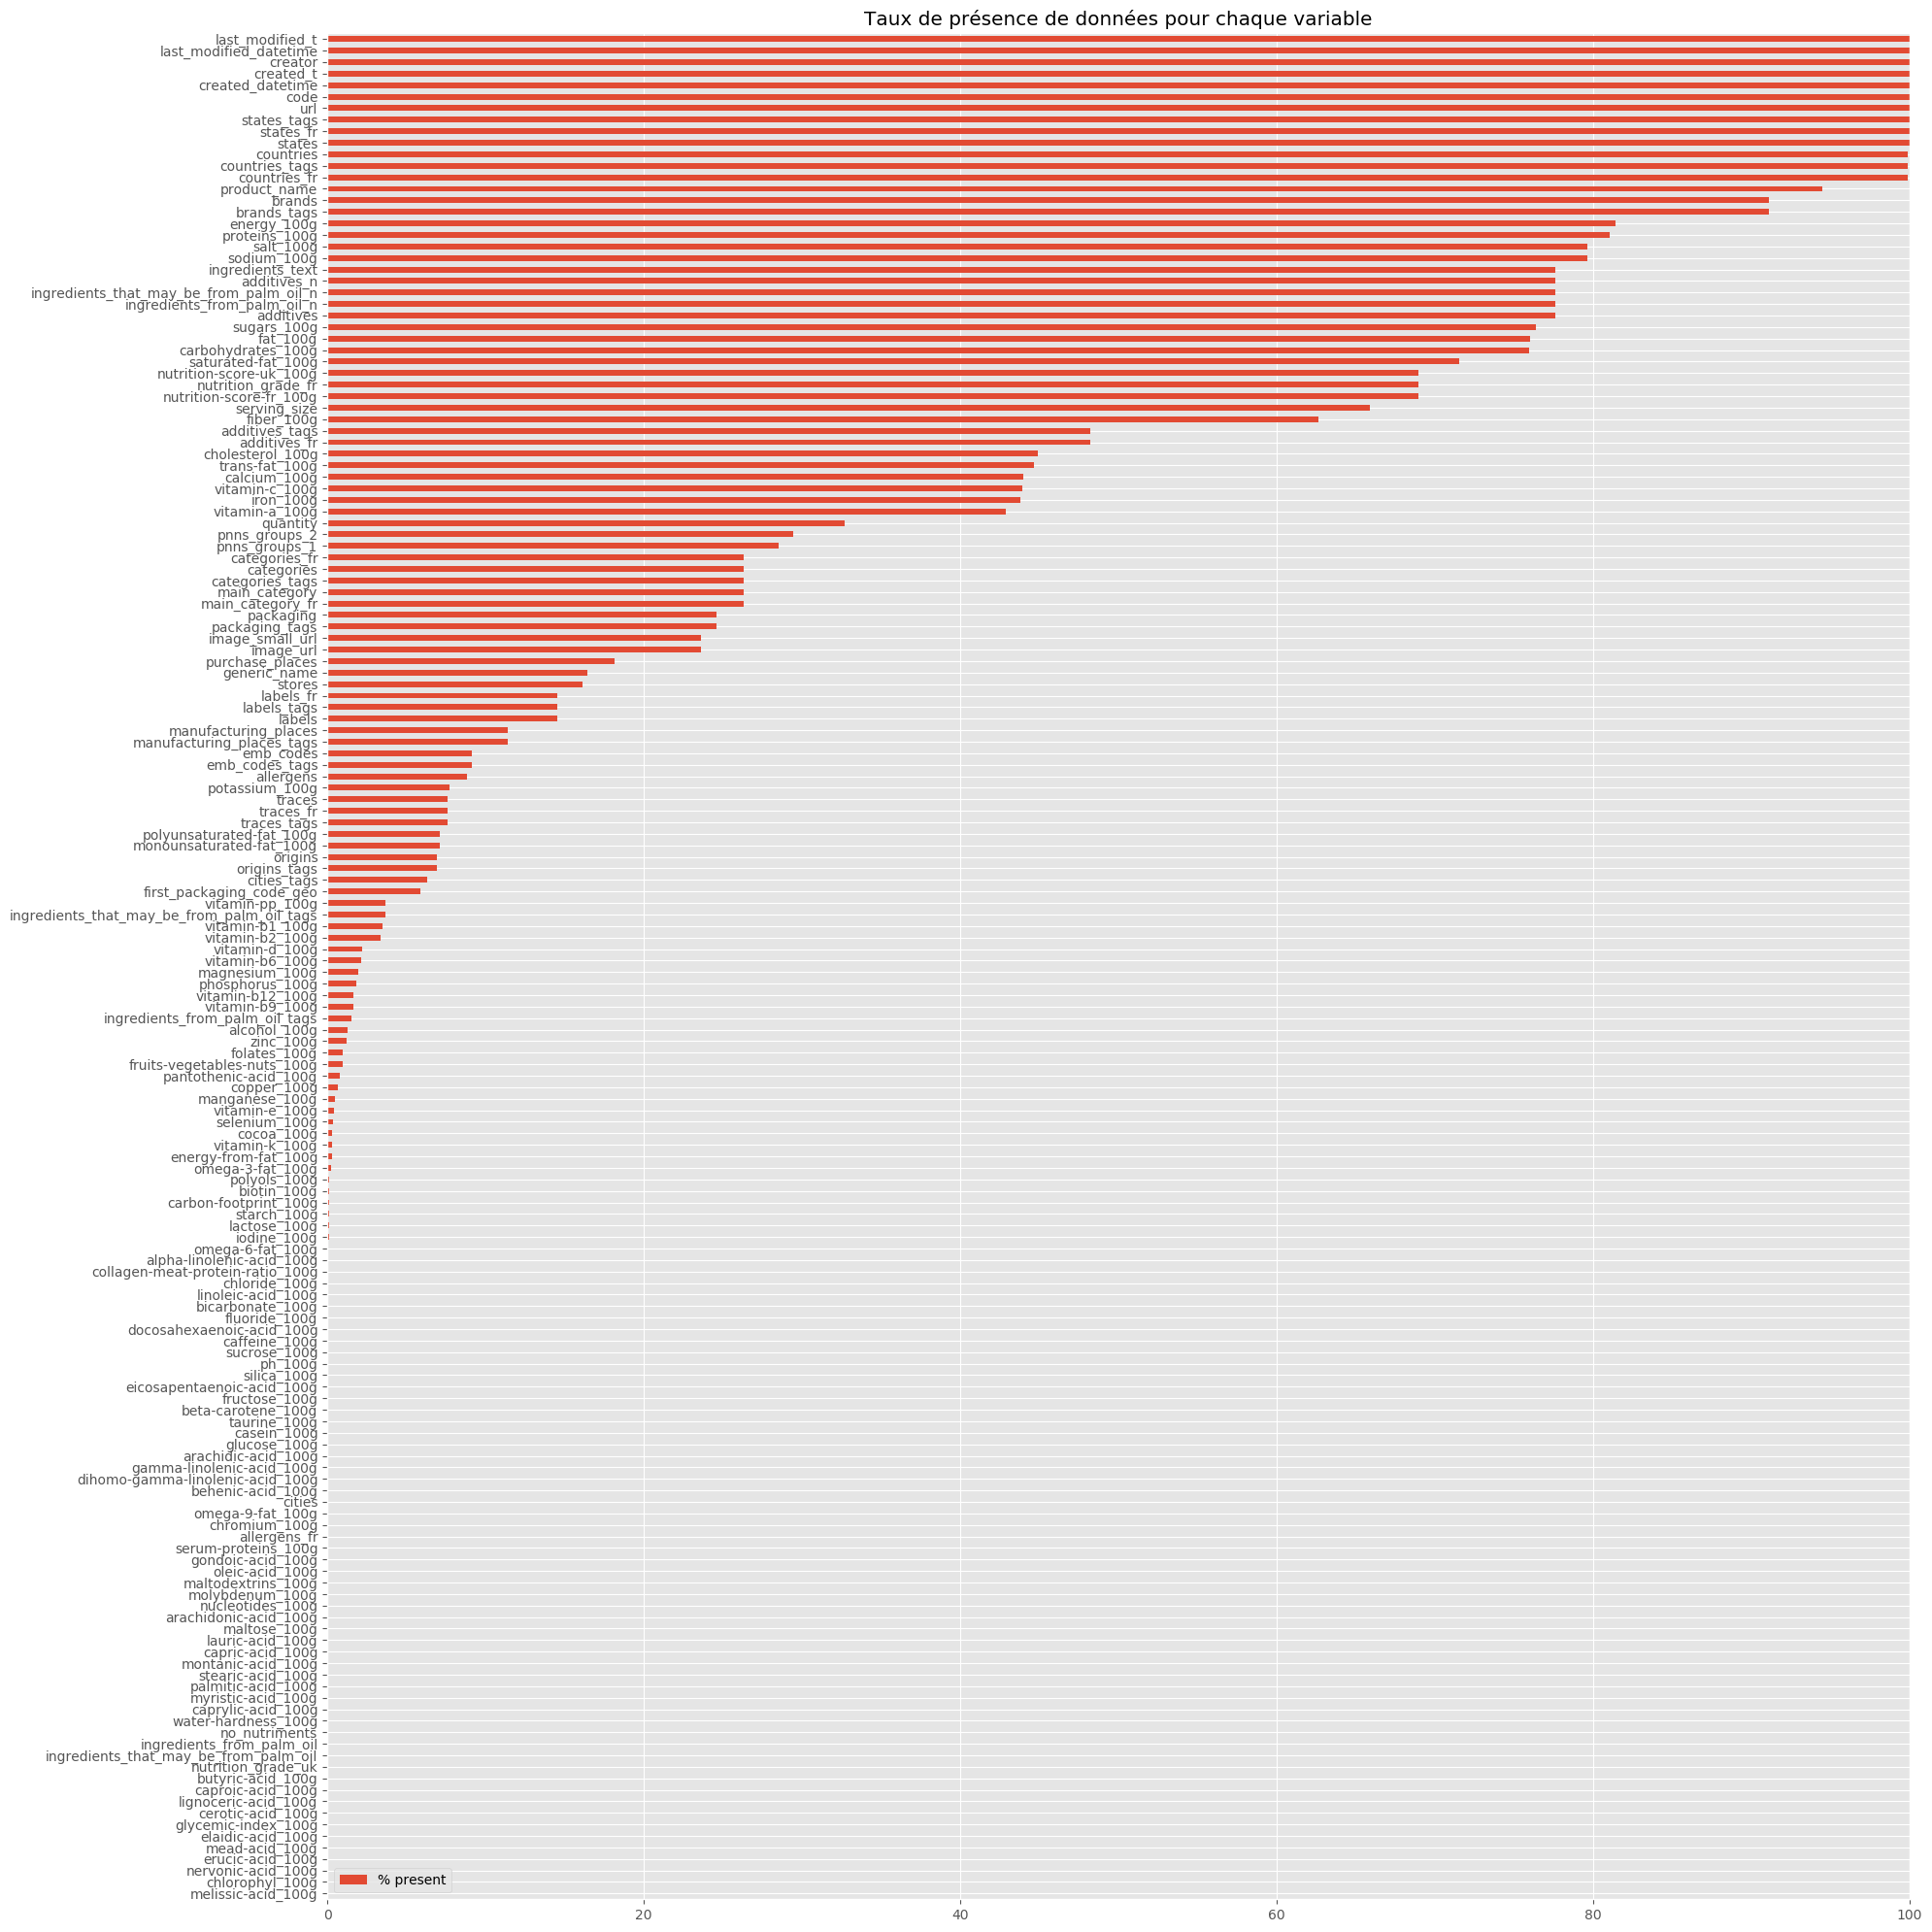

In [7]:
presence_columns.plot(kind='barh', figsize=(20, 20), xlim=(0, 100), 
                      title='Taux de présence de données pour chaque variable')
plt.tight_layout();

*Sanity check*: vérifions que NA n'est pas un encodage pour la valeur 0 dans les attributs nutritionnels, en regardant si cette valeur existe déjà dans leur distribution.

In [8]:
mask = presence_columns.loc[presence_columns['% present'] >= 1]
(data.loc[:, mask.index].filter(like='_100g') == 0).sum(axis=0)

zinc_100g                       73
alcohol_100g                  1555
vitamin-b9_100g                 13
vitamin-b12_100g               107
phosphorus_100g                 41
magnesium_100g                  76
vitamin-b6_100g                139
vitamin-d_100g                 345
vitamin-b2_100g                361
vitamin-b1_100g                328
vitamin-pp_100g                244
monounsaturated-fat_100g      5757
polyunsaturated-fat_100g      6320
potassium_100g                 775
vitamin-a_100g               78620
iron_100g                    42678
vitamin-c_100g               90500
calcium_100g                 51048
trans-fat_100g              140297
cholesterol_100g             89441
fiber_100g                   68833
nutrition-score-fr_100g      12763
nutrition-score-uk_100g      13588
saturated-fat_100g           68736
carbohydrates_100g           21607
fat_100g                     64504
sugars_100g                  37077
sodium_100g                  34131
salt_100g           

Compte-tenu de la grande présence de valeurs manquantes dans notre dataset, on choisit de supprimer toutes les variables qui ont moins de 5% de présence sur toutes les instances.

Étant donné le nombre important de lignes dans notre dataset, on suppose qu'on obtiendra une distribution convenable pour les attributs restants, même avec ce faible pourcentage de présence.

In [9]:
mask = presence_columns.loc[presence_columns['% present'] >= 5]
cleaned_1 = data.loc[:, mask.index] 

cleaned_1.shape, cleaned_1.columns

((320772, 75),
 Index(['first_packaging_code_geo', 'cities_tags', 'origins_tags', 'origins',
        'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'traces_tags',
        'traces_fr', 'traces', 'potassium_100g', 'allergens', 'emb_codes_tags',
        'emb_codes', 'manufacturing_places_tags', 'manufacturing_places',
        'labels', 'labels_tags', 'labels_fr', 'stores', 'generic_name',
        'purchase_places', 'image_url', 'image_small_url', 'packaging_tags',
        'packaging', 'main_category_fr', 'main_category', 'categories_tags',
        'categories', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2',
        'quantity', 'vitamin-a_100g', 'iron_100g', 'vitamin-c_100g',
        'calcium_100g', 'trans-fat_100g', 'cholesterol_100g', 'additives_fr',
        'additives_tags', 'fiber_100g', 'serving_size',
        'nutrition-score-fr_100g', 'nutrition_grade_fr',
        'nutrition-score-uk_100g', 'saturated-fat_100g', 'carbohydrates_100g',
        'fat_100g', 'sugars_100g', '

Parmi les attributs restants, beaucoup ne sont pas utiles pour déterminer l'apport nutritionnel d'un aliment:
- repérons dans un premier temps les variables d'informations générales (géographiques, commerciales...). De cette catégorie, nous ne conservons que la variable `code` qui servira de clé primaire dans notre base de données, si le client souhaite avoir accès à des informations supprimées pour un produit en particulier.
- puis des variables inutilisables qui contiennent généralement des listes d'ingrédients très diverses, ce qui créé des attributs catégoriels avec beaucoup de modalités, ce qui ne permet pas de faire ressortir des *patterns* généraux pour l'ensemble.
- et enfin des variables inutiles qui contiennent la même information ou moins d'information que des variables que nous gardons.

In [10]:
generales = ['first_packaging_code_geo', 'cities_tags', 'origins_tags', 'origins',
             'manufacturing_places_tags', 'manufacturing_places', 'brands_tags', 'brands',
             'product_name', 'countries_fr', 'countries_tags', 'countries', 'states', 'states_fr', 'states_tags',
             'url', 'created_datetime', 'created_t', 'creator', 'last_modified_datetime', 'last_modified_t',
             'emb_codes_tags', 'emb_codes', 'stores', 'generic_name', 'purchase_places', 'image_url',
             'image_small_url', 'packaging_tags', 'packaging', 'labels', 'labels_tags', 'labels_fr']

inutiles = ['traces_tags', 'traces_fr', 'traces', 'allergens', 'ingredients_text', 'quantity', 'serving_size']

redondantes = ['main_category_fr', 'main_category', 'categories_tags', 'categories', 'categories_fr',
               'additives_fr', 'additives_tags', 'additives',
               'ingredients_that_may_be_from_palm_oil_n',
               'pnns_groups_2']

cleaned_2 = cleaned_1.drop(generales + inutiles + redondantes, axis=1).set_index('code')
cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320772 entries, 0000000003087 to 999990026839
Data columns (total 24 columns):
monounsaturated-fat_100g       22823 non-null float64
polyunsaturated-fat_100g       22859 non-null float64
potassium_100g                 24748 non-null float64
pnns_groups_1                  91513 non-null object
vitamin-a_100g                 137554 non-null float64
iron_100g                      140462 non-null float64
vitamin-c_100g                 140867 non-null float64
calcium_100g                   141050 non-null float64
trans-fat_100g                 143298 non-null float64
cholesterol_100g               144090 non-null float64
fiber_100g                     200886 non-null float64
nutrition-score-fr_100g        221210 non-null float64
nutrition_grade_fr             221210 non-null object
nutrition-score-uk_100g        221210 non-null float64
saturated-fat_100g             229554 non-null float64
carbohydrates_100g             243588 non-null float64
fa

## Traitement des données abbérantes

Observons la distribution des variables catégoriques pour y réperer d'éventuelles anomalies

In [11]:
cleaned_2['nutrition_grade_fr'].value_counts()

d    62763
c    45538
e    43030
a    35634
b    34245
Name: nutrition_grade_fr, dtype: int64

In [12]:
cleaned_2['pnns_groups_1'].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

Pour la variable `pnns_groups_1`, nous observons des catégories redondantes que nous allons uniformiser dans leur format, et une catégorie inutile (`unknown`) que nous considérons comme un signalement de valeur manquante.

In [13]:
cleaned_2['pnns_groups_1'] = (cleaned_2['pnns_groups_1'].map(lambda x: '-'.join(x.lower().split()), na_action='ignore')
                              .replace(['unknown'], [np.nan]))

cleaned_2['pnns_groups_1'].value_counts()

sugary-snacks              12864
beverages                   9033
milk-and-dairy-products     8825
cereals-and-potatoes        8458
fish-meat-eggs              8041
fruits-and-vegetables       6895
composite-foods             6747
fat-and-sauces              5216
salty-snacks                2810
Name: pnns_groups_1, dtype: int64

Regardons de plus près les distributions des variables numériques discrètes

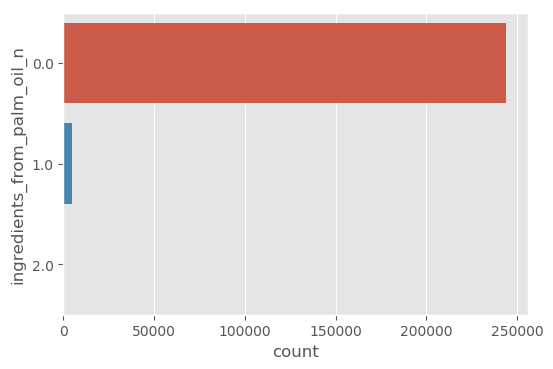

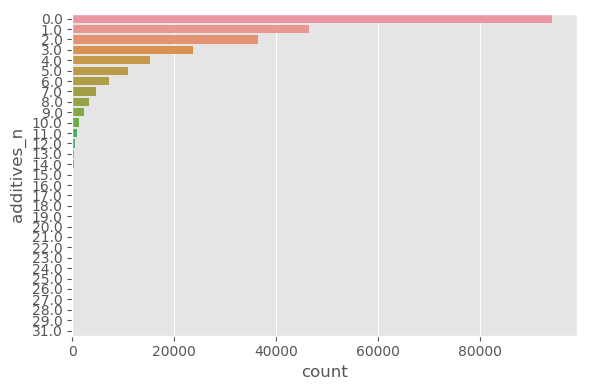

In [14]:
discretes = cleaned_2.filter(like='_n').columns
for col in discretes:
    plt.figure()
    sns.countplot(y=col, data=cleaned_2)
plt.tight_layout()

Passons maintenant au sous-ensemble des attributs numériques continus (sauf attributs cibles). Profitons-en pour y supprimer les valeurs négatives.

In [15]:
labels = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']
num_columns = (cleaned_2.select_dtypes(include=[np.number])
               .drop(discretes.tolist() + labels, axis=1)
               .columns)
num_data = cleaned_2.loc[:, num_columns]

num_data[num_data < 0] = np.nan

Conservons certaines caractéristiques de positions sur les données avant suppression des valeurs aberrantes

In [16]:
def quartiles(df, value_name):
    """
    Pour une selection de variables numériques données, on calcule plusieurs caractéristiques de position.
    Puis on applique un 'anti-pivot' sur la dataframe resultante pour obtenir sur chaque ligne une valeur
    et ses identifiants (variable, caractéristique)
    """

    return (df.quantile([0.25, 0.5, 0.75]).transpose()
            .reset_index()
            .rename(columns={'index': 'Variable', 0.25: 'Q1', 0.5: 'Q2', 0.75: 'Q3'})
            .pipe(pd.melt, id_vars=['Variable'], var_name='Quartile', value_name=value_name)
            )


Avant = quartiles(num_data, 'Brute')

Tout d'abord observons la distribution de leurs valeurs grâce à des boxplots

In [17]:
def display_boxplots(num_data, title):
    f, axarr = plt.subplots(6, 3, figsize=(20, 20))
    i, j = 0, 0
    plt.suptitle(title, y=0.9, fontsize=15); 
    
    for col in num_columns:
        sns.boxplot(y=col, data=num_data, ax = axarr[i, j])
        j += 1
        if j > 2:
            j = 0
            i += 1

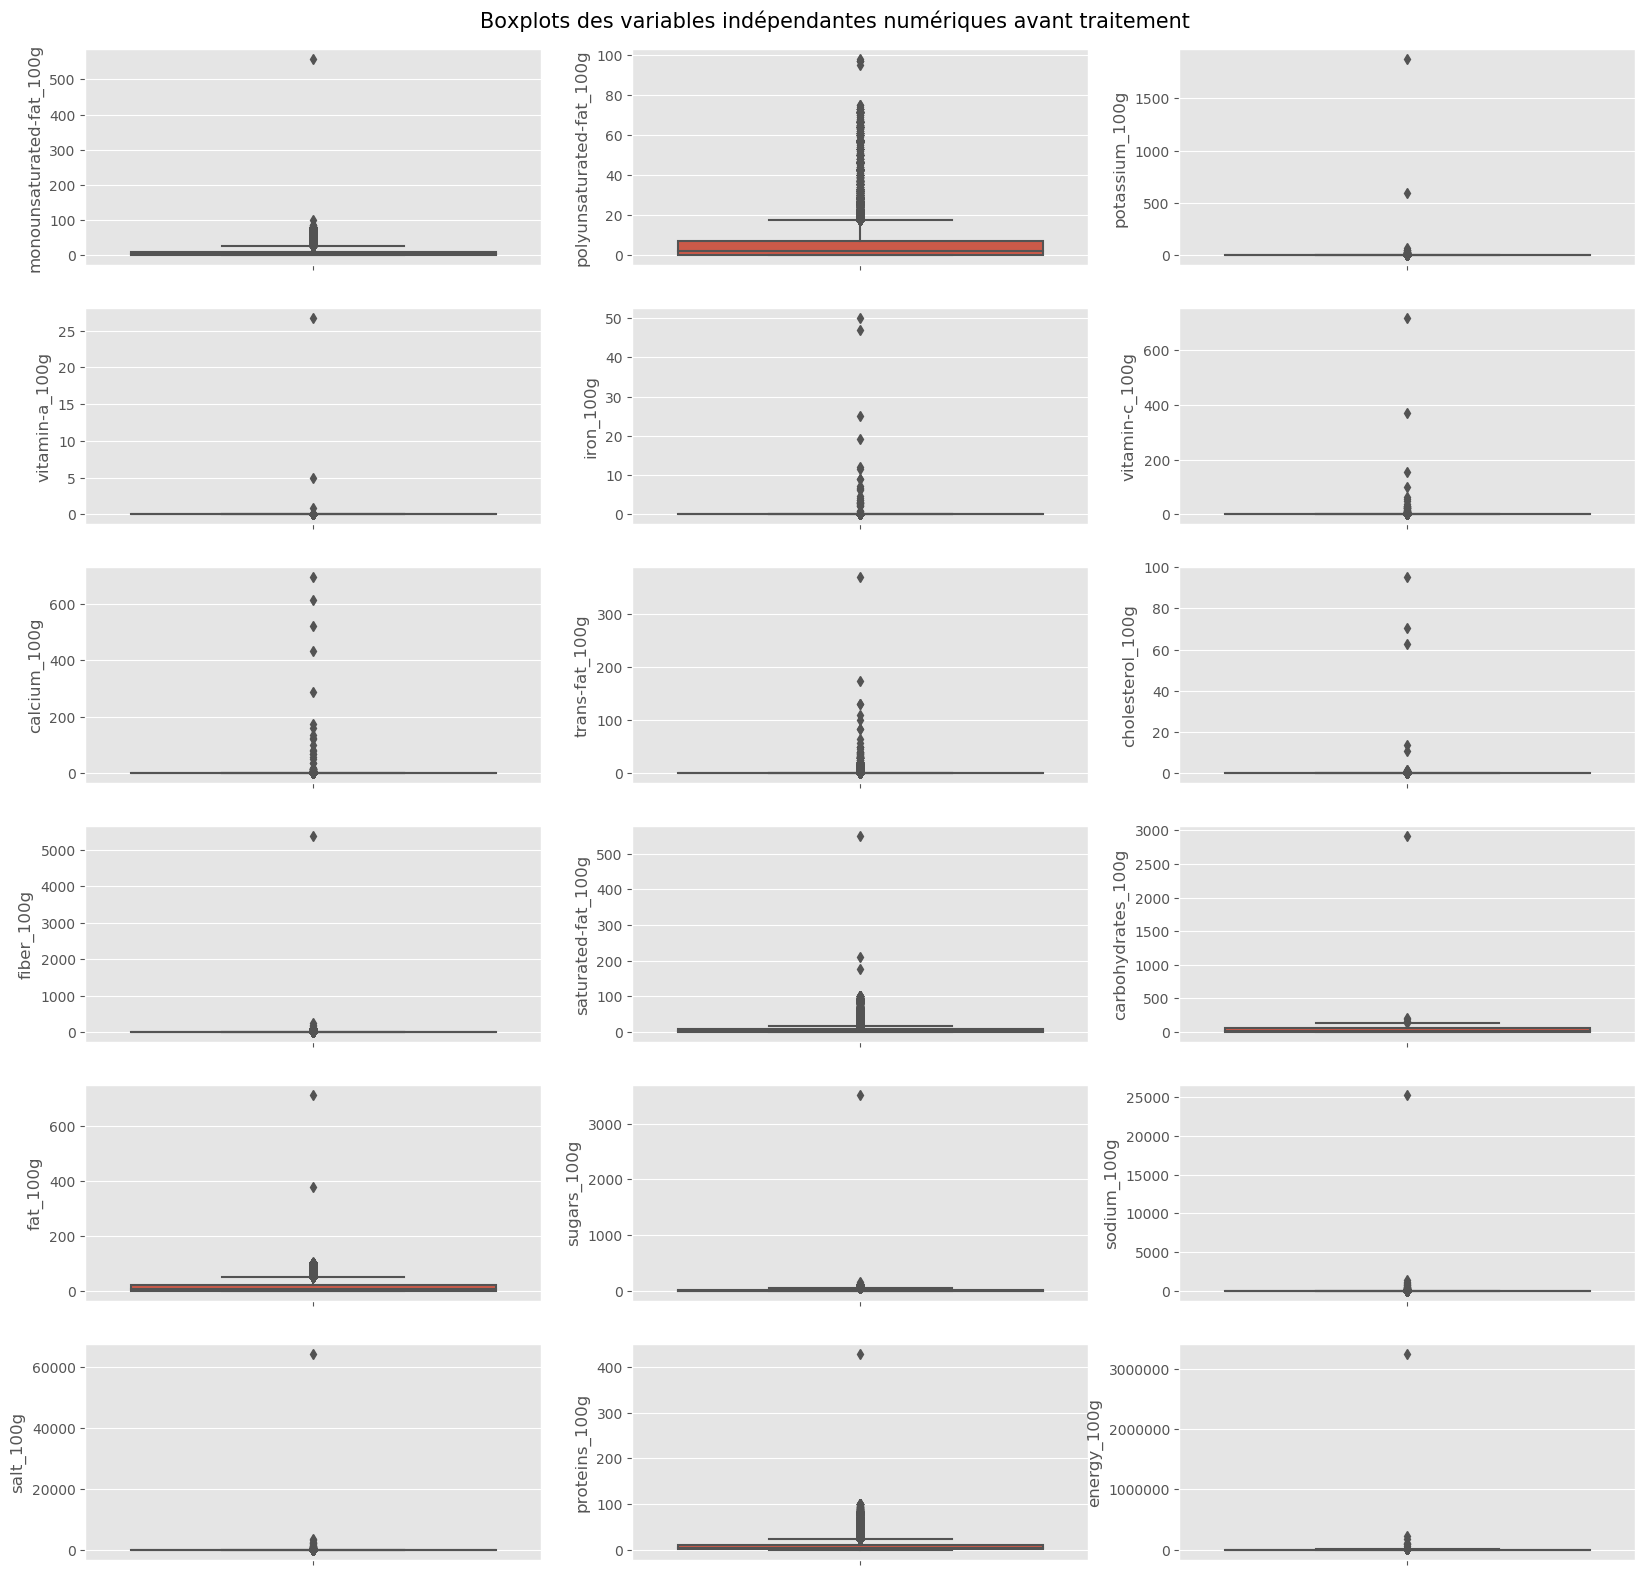

In [18]:
display_boxplots(num_data, 'Boxplots des variables indépendantes numériques avant traitement')

Nous allons maintenant supprimer les *outliers* remarqués (en replaçant ces valeurs par des valeurs manquantes).

Nous proposons une première méthode qui supprime les instances si leur distance - standardisée - à la moyenne dépasse un certain seuil. Regardons combien d'instances seraient concernées.

In [19]:
z_threshold = 3

mask = (num_data.transform(lambda x: (x - x.mean()) / x.std())
        .applymap(lambda x: np.abs(x) > z_threshold))
mask.sum()

monounsaturated-fat_100g    1156
polyunsaturated-fat_100g     682
potassium_100g                 7
vitamin-a_100g                 3
iron_100g                     27
vitamin-c_100g                31
calcium_100g                  29
trans-fat_100g               556
cholesterol_100g               8
fiber_100g                   269
saturated-fat_100g          2589
carbohydrates_100g             7
fat_100g                    5250
sugars_100g                 3445
sodium_100g                   28
salt_100g                     28
proteins_100g               3390
energy_100g                    9
dtype: int64

Appliquons le traitement et observons son résultat en affichant de nouveaux les boxplots des variables concernées.

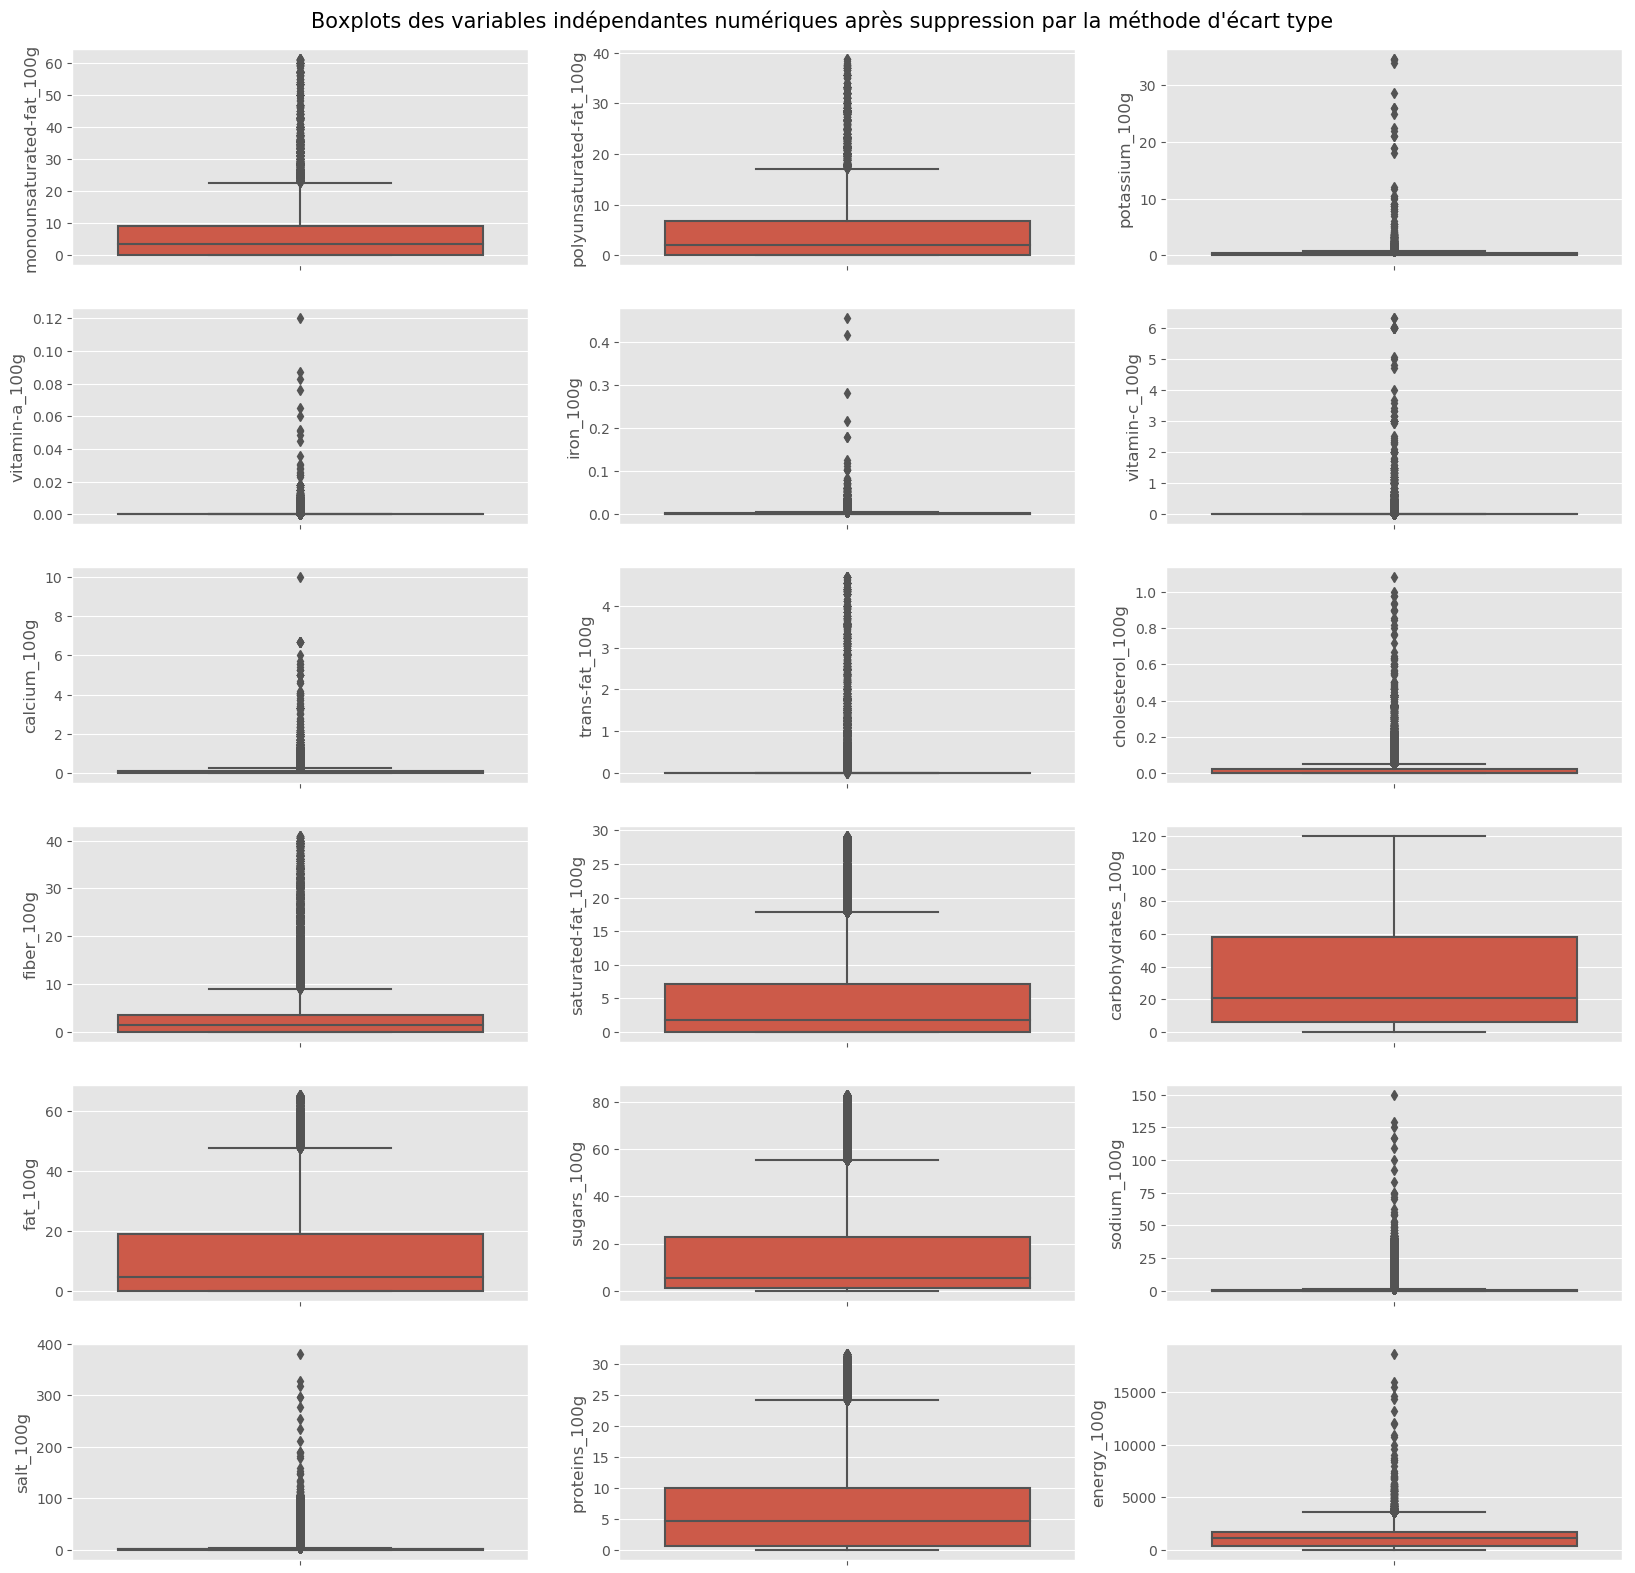

In [20]:
for col in num_columns:
    num_data.loc[mask[col], col] = np.nan 

display_boxplots(num_data, "Boxplots des variables indépendantes numériques après suppression par la méthode d'écart type")

Nous observons que cette méthode a laissé beaucoup d'*outliers* présents.

Nous en proposons une seconde qui supprime par variable les instances qui se trouvent hors des *moustaches* des boxplots, c'est à dire à une certaine distance au-dessous du 1e quartile ou au-delà du 3e quartile de chaque variable. Affichons combien d'instances seraient concernées par cette méthode.

In [21]:
# Effacer le premier traitement
num_data = cleaned_2.loc[:, num_columns]
num_data[num_data < 0] = np.nan


def outlier_detection(col, ratio):
    """Pour un variable donné, labeliser comme outlier une valeur qui est:
    - inférieure à q1 - ratio*iqr
    - supérieure à q3 + ratio*iqr"""
    iqr = col.quantile(0.75) - col.quantile(0.25)
    return ~col.between(
        col.quantile(0.25) - ratio*iqr,
        col.quantile(0.75) + ratio*iqr)


mask_2 = num_data.transform(outlier_detection, ratio=2) & cleaned_2.loc[:,num_columns].notnull()
mask_2.sum()

monounsaturated-fat_100g     1979
polyunsaturated-fat_100g     1718
potassium_100g               1685
vitamin-a_100g              11945
iron_100g                    4642
vitamin-c_100g              20461
calcium_100g                 9806
trans-fat_100g               3001
cholesterol_100g            17159
fiber_100g                   8032
saturated-fat_100g           8682
carbohydrates_100g              4
fat_100g                     5767
sugars_100g                  8582
sodium_100g                 13124
salt_100g                   13125
proteins_100g                4367
energy_100g                   122
dtype: int64

Appliquons le traitement et observons le resultat avec la même technique de visualisation

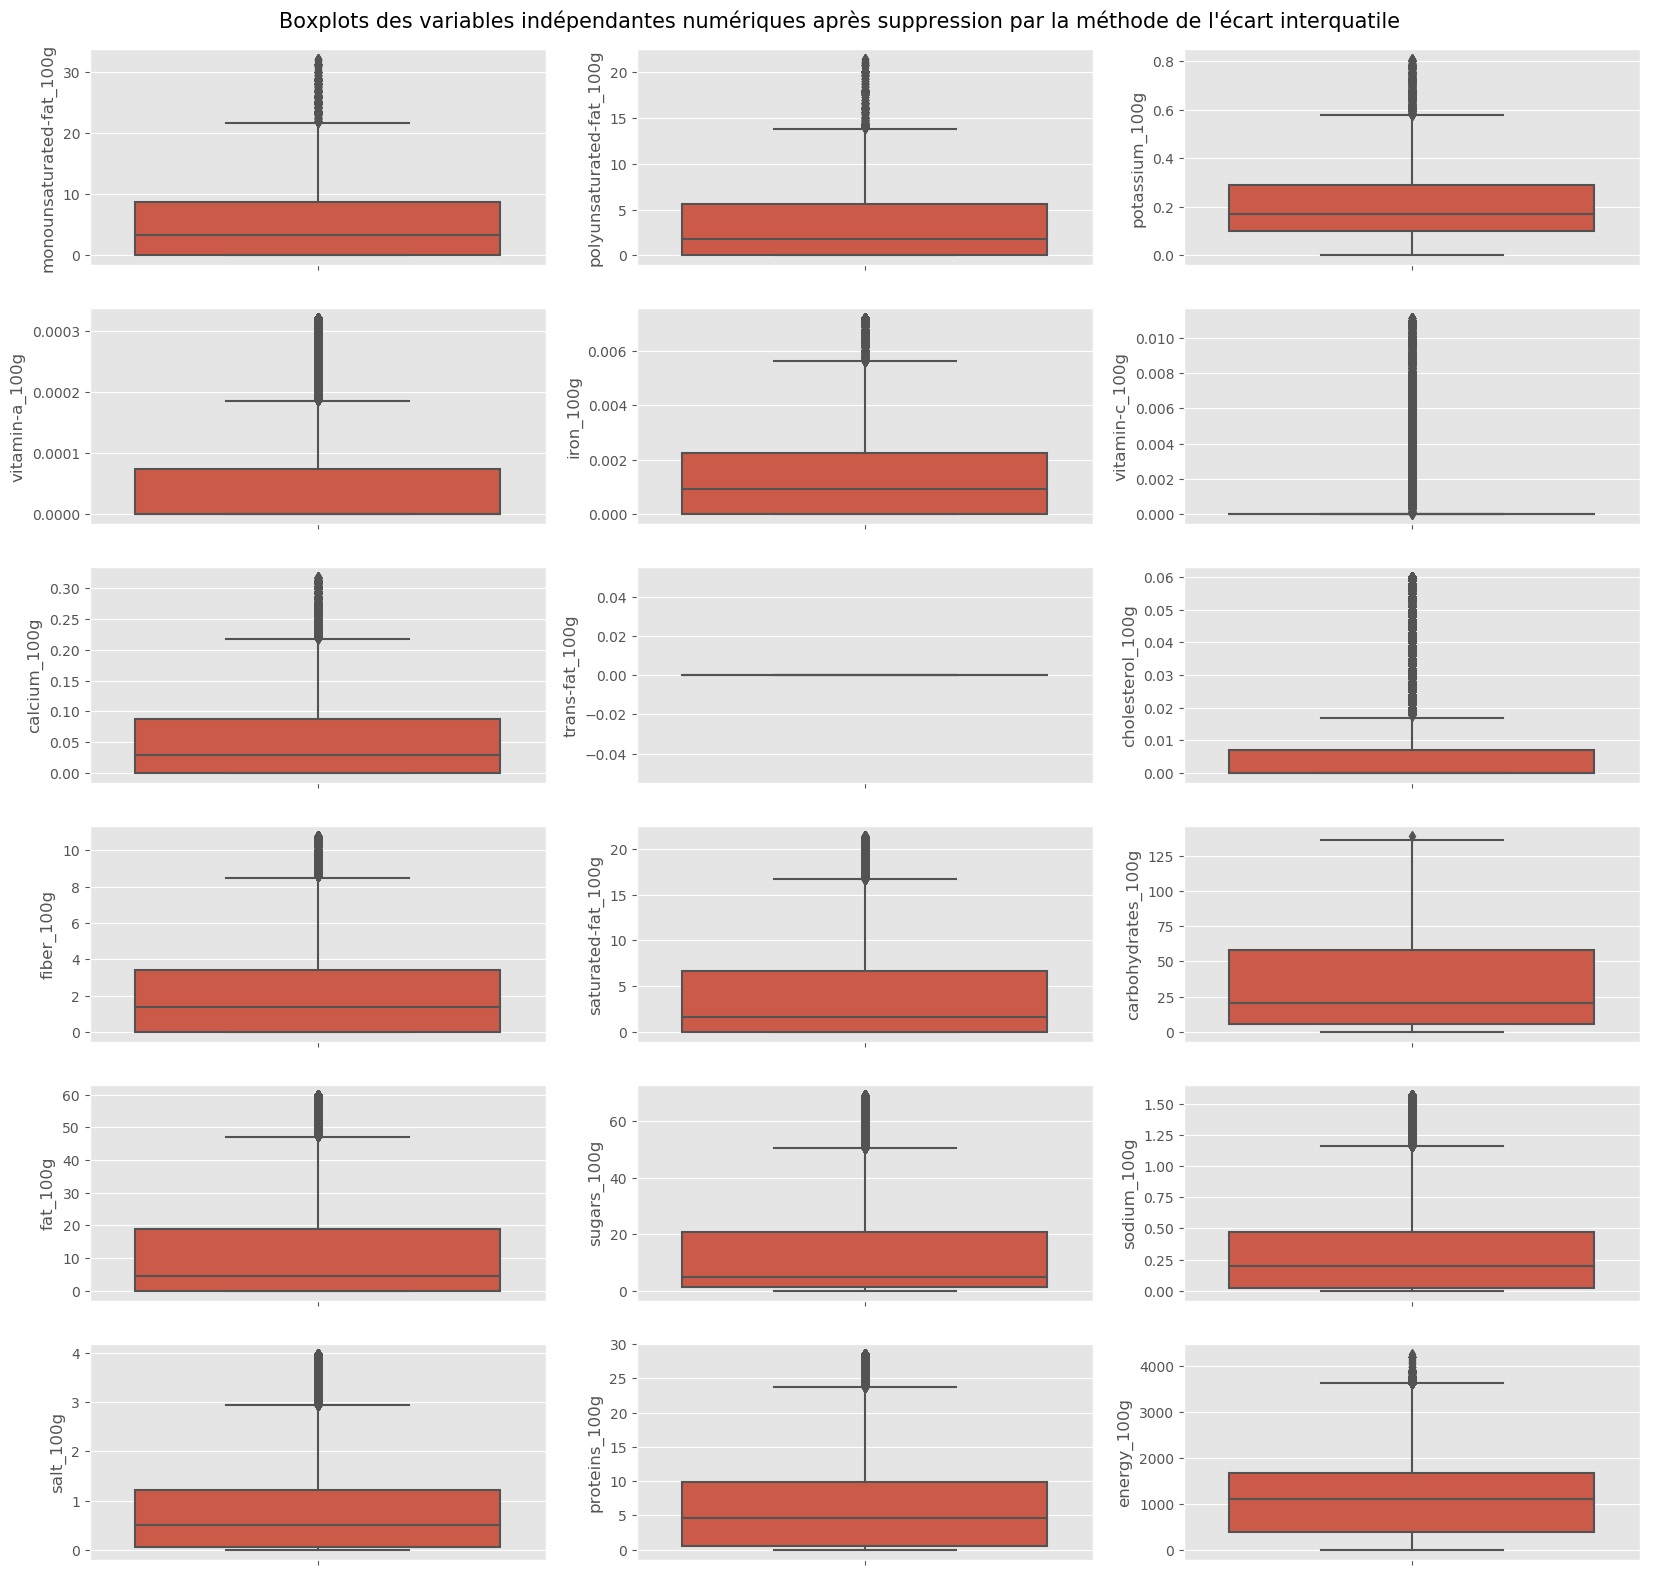

In [22]:
for col in num_columns:
    num_data.loc[mask_2[col], col] = np.nan 

display_boxplots(num_data, "Boxplots des variables indépendantes numériques après suppression par la méthode de l'écart interquatile")

Le 2nd traitement permet d'obtenir des distributions plus régulières. 

Calculons à nouveau les mêmes caractéristiques positionnelles robustes, sur nos variables nettoyées cette fois-ci, et comparons les avec celles d'avant traitement afin de nous assurer que nos distributions n'ont pas été trop biasées.

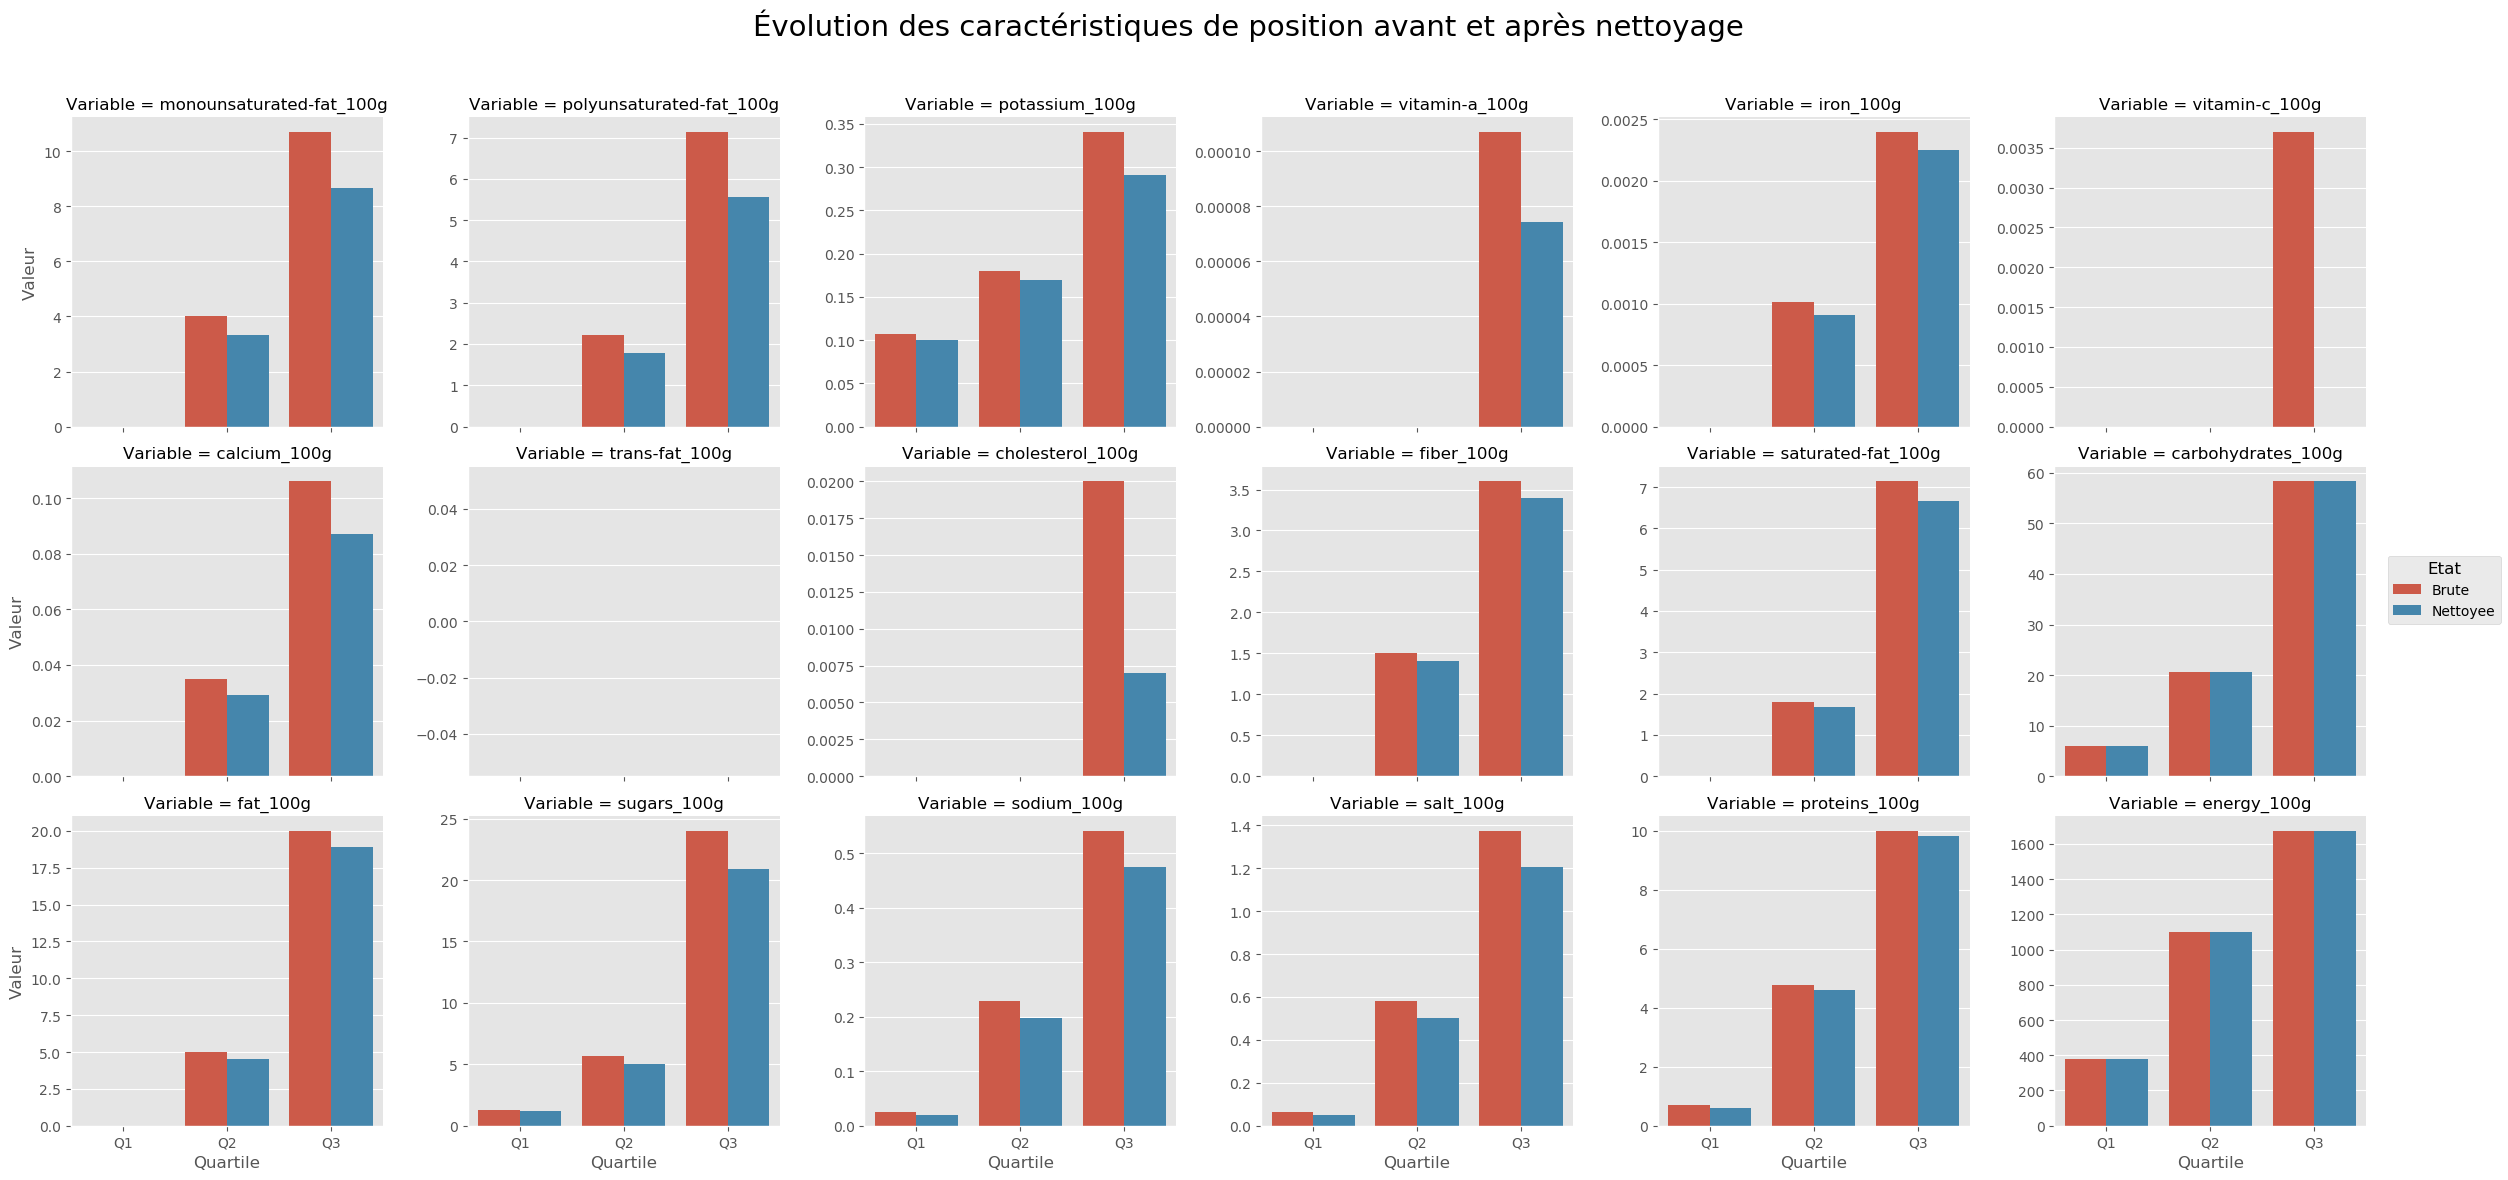

In [23]:
Apres = quartiles(num_data, 'Nettoyee')

g = (pd.merge(Avant, Apres, on=['Variable', 'Quartile'])
     .pipe(pd.melt, id_vars=['Variable', 'Quartile'], var_name=['Etat'], value_name='Valeur')
     .pipe((sns.factorplot, 'data'), x='Quartile', y='Valeur', hue='Etat', col='Variable', 
           kind='bar', ci='None', sharey=False, col_wrap=6, legend=True)
    )

plt.subplots_adjust(top=0.89)
g.fig.suptitle('Évolution des caractéristiques de position avant et après nettoyage', size=21);

Après ce traitement la variable `trans-fat_100g` est constamment à valeur nulle, et `vitamin-c_100g` le devient quasiment . Avant traitement d'outliers, elles avaient déjà un grand nombre de valeurs nulles. Nous décidons de les supprimer.

In [24]:
for var in ['trans-fat_100g', 'vitamin-c_100g']:
    print(var,
          "\n\tNombres de valeurs non-manquantes: " + str(cleaned_2[var].notnull().sum()) +
          "\n\tNombres de valeurs nulles: " + str((cleaned_2[var] == 0).sum()), "\n\n")

trans-fat_100g 
	Nombres de valeurs non-manquantes: 143298
	Nombres de valeurs nulles: 140297 


vitamin-c_100g 
	Nombres de valeurs non-manquantes: 140867
	Nombres de valeurs nulles: 90500 




Nous ajoutons tous ces changements dans la dataframe générale.

In [25]:
cleaned_3 = cleaned_2.copy()
cleaned_3.loc[:, num_columns.tolist()] = num_data
cleaned_3.drop(['trans-fat_100g', 'vitamin-c_100g'], axis=1, inplace=True)

## Finitions

Affichons le nombre de lignes d'attributs à valeur non manquante par ligne dans l'ensemble du dataset

In [26]:
presence_lignes = pd.DataFrame(
    data=(cleaned_3.notnull()
          .sum(axis=1)
          .sort_values()),
    columns=['presence_cols']
)

presence_lignes.tail(n=10)

,presence_cols
code,
0051000000118,22
0044000035389,22
0078742118505,22
0029000016088,22
0000001938067,22
0051000115515,22
0061954000539,22
0044000031138,22
0051000012616,22


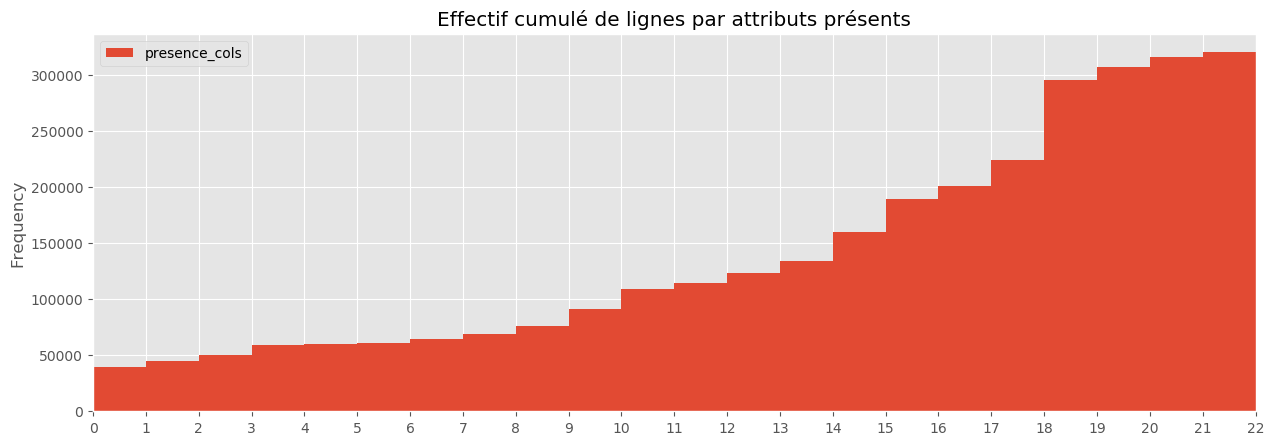

In [27]:
n_col = cleaned_3.shape[1]
presence_lignes.plot(kind='hist', bins=n_col, cumulative=True, 
                     xticks=np.arange(0, n_col+1, 1), xlim=(0, n_col), figsize=(15, 5), 
                     title='Effectif cumulé de lignes par attributs présents');

Nous ne gardons pas les lignes qui contiennent que des valeurs manquantes.

In [28]:
mask = presence_lignes[presence_lignes['presence_cols'] > 0]
cleaned = cleaned_3.loc[mask.index, :]

cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281685 entries, 2000000017811 to 0044000032586
Data columns (total 22 columns):
monounsaturated-fat_100g       20844 non-null float64
polyunsaturated-fat_100g       21141 non-null float64
potassium_100g                 23063 non-null float64
pnns_groups_1                  68889 non-null object
vitamin-a_100g                 125609 non-null float64
iron_100g                      135820 non-null float64
calcium_100g                   131244 non-null float64
cholesterol_100g               126931 non-null float64
fiber_100g                     192854 non-null float64
nutrition-score-fr_100g        221210 non-null float64
nutrition_grade_fr             221210 non-null object
nutrition-score-uk_100g        221210 non-null float64
saturated-fat_100g             220872 non-null float64
carbohydrates_100g             243584 non-null float64
fat_100g                       238124 non-null float64
sugars_100g                    236389 non-null float64
i

Comparons la proportion de valeurs manquantes dans notre jeu de données avant et après nettoyage.

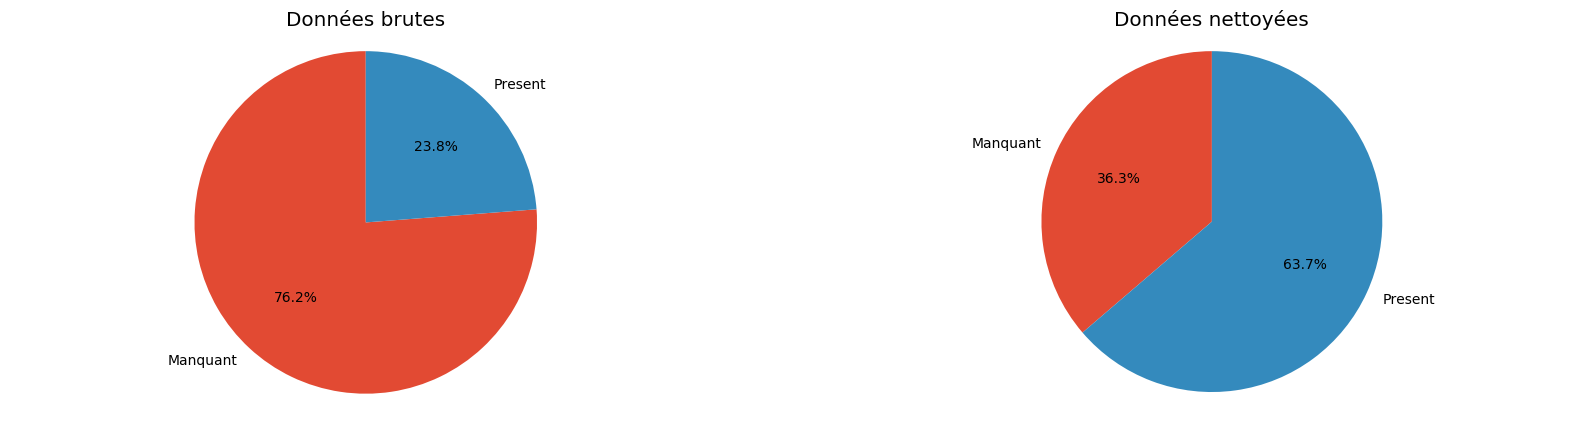

In [29]:
labels = 'Manquant', 'Present'

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sizes = data.isnull().sum().sum(), data.notnull().sum().sum()
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Données brutes")

sizes = cleaned.isnull().sum().sum(), cleaned.notnull().sum().sum()
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax[1].axis('equal')
ax[1].set_title("Données nettoyées")

plt.show()

Apportons quelques derniers changements sur l'organisation de notre dataframe

In [30]:
# ordonner les colonnes: mettre les variables les variables cibles à la fin
columns = cleaned.columns.values.tolist()
targets = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'nutrition_grade_fr']
for t in targets:
    columns.remove(t)
    columns.append(t)
    
# appliquer ordre et changer les caractères séparateurs pour consistence
cleaned = cleaned.reindex(columns=columns).rename(columns= lambda x: x.replace('-', '_'))

Nous pouvons exporter notre base de données nettoyée afin de commencer l'exploration dans un second notebook.

In [31]:
cleaned.to_csv('data/cleaned_data.csv')